# BD inhibition and inducible gene and enhancer bursts

All replicates

In [31]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

include(ENV["Code"]*"/../Code_Paper/Databases/Cuartero2018.jl")
include(ENV["Code"]*"/../Code_Paper/Databases/mm9.jl")
include(ENV["Code"]*"/../Code_Paper/Code/meanmRNAcounts_BSBF.jl")

ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

include(ENV["Code"]*"/../Code_Paper/Databases/Cuartero2018.jl")
include(ENV["Code"]*"/../Code_Paper/Databases/mm9.jl")
include(ENV["Code"]*"/../Code_Paper/Code/meanmRNAcounts_BSBF.jl")

include("LoadData.jl")
include("Functions.jl")
include("DoTests.jl");

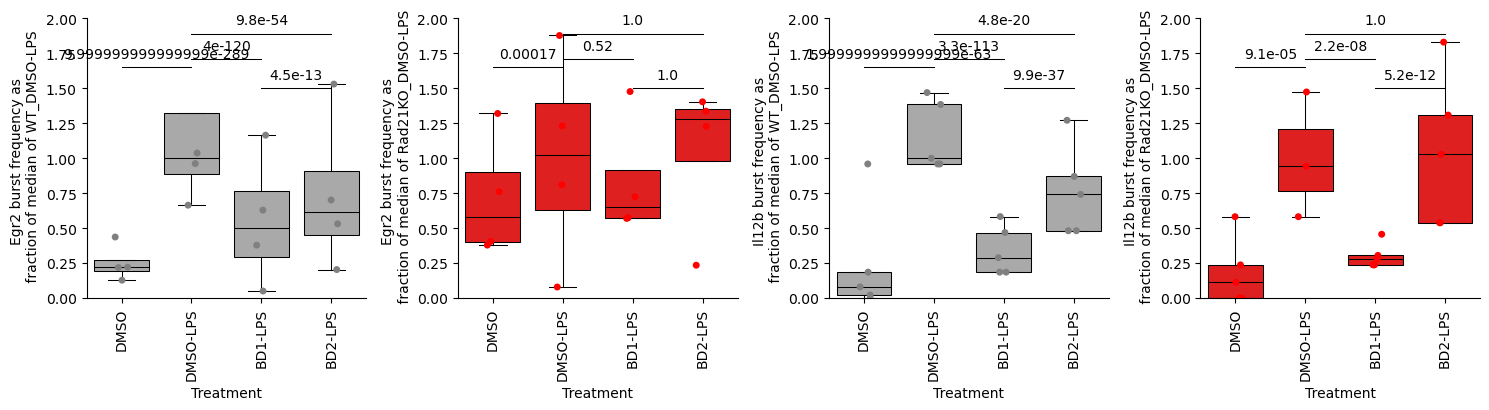

In [42]:
function WT_DMSOLPSas1(df)
    ndf = deepcopy(df)
    bfas1 = Statistics.median(ndf[ndf[!,:Sample].=="WT_DMSO-LPS", :BF])
    ndf[!,:BF] = ndf[!,:BF] ./ bfas1
    ndf
end


function Rad21KO_DMSOLPSas1(df)
    ndf = deepcopy(df)
    bfas1 = Statistics.mean(ndf[ndf[!,:Sample].=="Rad21KO_DMSO-LPS", :BF])
    ndf[!,:BF] = ndf[!,:BF] ./ bfas1
    ndf
end

figure(figsize = (15, 5))
subplot(1,4,1)

n = 3
plot_BF_Genotype(WT_DMSOLPSas1(BFs_all_gene_egr2),TEST_gene_egr2;
    hs = [0.55, 0.57, 0.63, 0.50].*n,
    ylimit = 2, 
    Genotype = "WT",
    colorstripplot = "gray",
    colorboxplot = "darkgray",
    ylabel_ = "Egr2 burst frequency as \n fraction of median of WT_DMSO-LPS")

subplot(1,4,2)
n = 3
u = 0
plot_BF_Genotype(Rad21KO_DMSOLPSas1(BFs_all_gene_egr2),TEST_gene_egr2;
    hs = [0.55, 0.57, 0.63, 0.50].*n.+ u,
    ylimit = 2, 
    Genotype = "Rad21KO",
    colorstripplot = "red",
    colorboxplot = "red",
    ylabel_ = "Egr2 burst frequency as \n fraction of median of Rad21KO_DMSO-LPS")


subplot(1,4,3)

n = 3
plot_BF_Genotype(WT_DMSOLPSas1(BFs_all_gene_il),TEST_gene_il;
    hs = [0.55, 0.57, 0.63, 0.50].*n,
    ylimit = 2, 
    Genotype = "WT",
    colorstripplot = "gray",
    colorboxplot = "darkgray",
    ylabel_ = "Il12b burst frequency as \n fraction of median of WT_DMSO-LPS")

subplot(1,4,4)
n = 3
u = -0
plot_BF_Genotype(Rad21KO_DMSOLPSas1(BFs_all_gene_il),TEST_gene_il;
    hs = [0.55, 0.57, 0.63, 0.50].*n.+ u,
    ylimit = 2, 
    Genotype = "Rad21KO",
    colorstripplot = "red",
    colorboxplot = "red",
    ylabel_ = "Il12b burst frequency as \n fraction of median of Rad21KO_DMSO-LPS")

plt.tight_layout()

savefigwithtext("Figure8b_alternative_asfr")